In [1]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,     # number of samples
    n_features=2,      # 2 input features
    n_informative=2,   # both features are informative
    n_redundant=0,     # no redundant features
    n_classes=2,       # binary classification (0 and 1)
    random_state=42
)

# X is shape (100, 2), y is shape (100,)



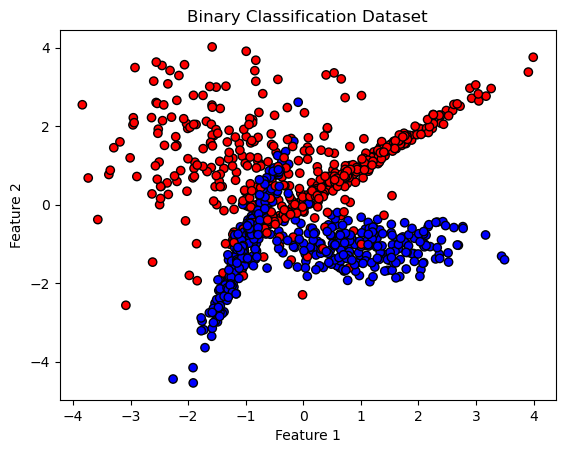

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()



In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
dt=DecisionTreeClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [4]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
from sklearn.metrics._classification import accuracy_score
from sklearn.metrics._classification import confusion_matrix

print("accuracy of lr" ,accuracy_score(lr_pred,y_test))
print("accuracy of Dt" ,accuracy_score(dt_pred,y_test))

print("confusion of lr  \n",confusion_matrix(lr_pred,y_test))
print("confusion of dt  \n",confusion_matrix(dt_pred,y_test))

accuracy of lr 0.88
accuracy of Dt 0.83
confusion of lr  
 [[92 17]
 [ 7 84]]
confusion of dt  
 [[83 18]
 [16 83]]


In [5]:
#using ensemble technique 
import numpy as np
from sklearn.model_selection import cross_val_score
estimators =  [('logistic regression',lr),('decision trees',dt)]

for estimator in estimators:
    x = cross_val_score (estimator [1], X, y, cv=10, scoring='accuracy')
    print (estimator [0], np. round (np.mean(x), 2))

logistic regression 0.86
decision trees 0.88


In [6]:
from sklearn.ensemble import VotingClassifier
#hard voting
vc = VotingClassifier(estimators= estimators,voting="hard")
x = cross_val_score (vc, X, y, cv=10, scoring='accuracy')
print (np. round (np.mean(x), 2))

0.88
